In [5]:
!pip install numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Construct Time Signal
SAMPLING_FREQUENCY = 2000 #2kHz aka 2000 samples a second
time_interval = 1 / SAMPLING_FREQUENCY #sample time interval
signal_frequency = 100 #this number of oscillations per unit of time

number_of_samples = int(10 * SAMPLING_FREQUENCY / signal_frequency) #Number of samples per cycle

t = np.linspace(0,(number_of_samples-1)*time_interval, number_of_samples)
frequency_resolution = SAMPLING_FREQUENCY / number_of_samples #frquency interval for each bin
f = np.linspace(0,(number_of_samples-1)*frequency_resolution, number_of_samples)

y = 1 * np.sin(2 * np.pi * signal_frequency * t) + .25 * np.sin(3 * np.pi * signal_frequency * t)

In [6]:
#Perform FFT
x = np.fft.fft(y) # will give back complex numbers

#only want magnitude      
x_magnitude = np.abs(x) 

#need to normalize
x_magnitude /= number_of_samples
    
f_plot = f[0:int(number_of_samples/2+1)] #half of the points

x_magnitude_plot = 2 * x_magnitude[0:int(number_of_samples/2+1)] #appends the same list onto the back

x_magnitude_plot[0] = x_magnitude_plot[0] / 2 #Note: DC component does not need to be multiplied by 2

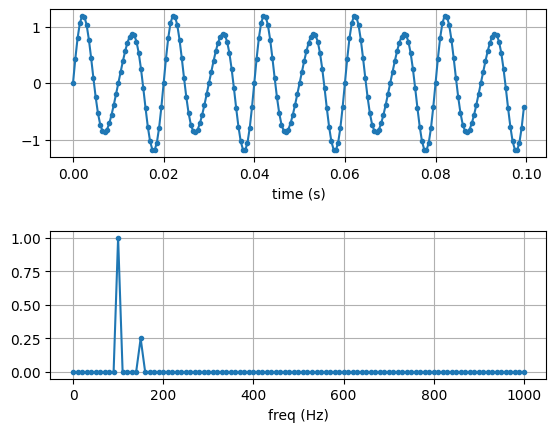

In [7]:
# plot results
fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)

ax1.plot(t,y, '.-')
ax2.plot(f_plot,x_magnitude_plot, '.-')

ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")

ax1.grid()
ax2.grid()
plt.subplots_adjust(hspace=0.5)  
plt.show()

In [6]:
print(np.trapz(x_magnitude_plot, x=f[0:len(x_magnitude_plot)]))
print(np.var(y))

10.000000000000181
0.5000000000000001
